### Summary Statistics and Plots
##### Sharan Sokhi (ss1148), Delaney Demark (dad48)

In [ ]:
# Imports (update throughout as necessary)
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt # just to format confusion matrix

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier

import re

#### Data loading and cleaning

Notes:
* No null values found
* No duplicate values found

In [ ]:
# Data loading
data10 = pd.read_csv('./datasets/dataset-of-10s.csv')
data00 = pd.read_csv('./datasets/dataset-of-00s.csv')
data90 = pd.read_csv('./datasets/dataset-of-90s.csv')
data80 = pd.read_csv('./datasets/dataset-of-80s.csv')
data70 = pd.read_csv('./datasets/dataset-of-70s.csv')
data60 = pd.read_csv('./datasets/dataset-of-60s.csv')

In [ ]:
# Data cleaning

# Drop all na values
data10 = data10.dropna()
data00 = data00.dropna()
data90 = data90.dropna()
data80 = data80.dropna()
data70 = data70.dropna()
data60 = data60.dropna()


# Add a decades column to each dataset (will be helpful when creating cumulative dataset)
data10['decade'] = [2010]*len(data10)
data00['decade'] = [2000]*len(data00)
data90['decade'] = [1990]*len(data90)
data80['decade'] = [1980]*len(data80)
data70['decade'] = [1970]*len(data70)
data60['decade'] = [1960]*len(data60)

In [ ]:
# Check for duplicates in dataset
merged = data10.merge(data00,on=['track','artist'])
merged = merged.merge(data90,on=['track','artist'])
merged = merged.merge(data80,on=['track','artist'])
merged = merged.merge(data70,on=['track','artist'])
merged = merged.merge(data60,on=['track','artist'])
merged
# NOTE: No duplicates found

,uri_x,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,time_signature_y,chorus_hit_y,sections_y,target_y,decade_y


In [ ]:
# Create cumulative dataset (from songs across all decades)
data = data10.append(data00,ignore_index=True).append(data90,ignore_index=True).append(data80,ignore_index=True).append(data70,ignore_index=True).append(data60,ignore_index=True)
data.head()
data.tail()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
41101,Le ire di Ursus,Giampiero Boneschi,spotify:track:3dVgolCVuNgecU5jovpc45,0.420,0.8730,3,-11.689,1,0.1000,0.808,0.879000,0.363,0.183,119.821,26244,4,0.00000,2,0,1960
41102,A-B-C,John Zacherle,spotify:track:0zXhzKf4raEYstebL7L42C,0.716,0.7420,10,-5.727,0,0.2420,0.663,0.000000,0.107,0.834,135.104,142987,4,28.34316,10,0,1960
41103,Useless Landscape,Antônio Carlos Jobim,spotify:track:2uC02PCRVM6BhAaK7dgxxp,0.361,0.0944,10,-22.663,1,0.0327,0.940,0.000178,0.115,0.139,92.472,137200,4,56.63498,6,0,1960
41104,Vendedor De Assaí,Ary Lobo,spotify:track:0gpSUWZWNIRrEenaC1ZGk9,0.452,0.7590,4,-7.821,0,0.1750,0.658,0.000000,0.738,0.853,137.976,159107,3,28.24372,9,0,1960
41105,Mambo Simphony - Remasterizado,Orquesta Casino De La Playa,spotify:track:5j0G0nkCSPlmSCSgXchMn3,0.554,0.2780,5,-8.386,1,0.0349,0.928,0.922000,0.136,0.428,131.401,164227,4,37.39251,8,0,1960


In [ ]:
# Add custom columns that will be useful later

# Duration of song in seconds
data["duration_sec"] = np.round(data["duration_ms"]*(1/1000))
data["duration_sec"]

# Loudness of sound (rounded)
data["loudness_rounded"] = np.round(data["loudness"])
data["loudness_rounded"]

0        -5.0
1       -15.0
2        -7.0
3        -6.0
4        -4.0
         ... 
41101   -12.0
41102    -6.0
41103   -23.0
41104    -8.0
41105    -8.0
Name: loudness_rounded, Length: 41106, dtype: float64

#### General statistics
Means, medians, modes, standard deviations of each column for both unique decades and the overall dataset

In [ ]:
# General stats (means, medians, standard deviations, etc) for each column (decades and overall)

# Number of rows and columns
num_rows = len(data.index)
num_columns = len(data.columns)

# Loudness Stats
loudness_stats = data.groupby('decade')['loudness'].describe().reset_index()
max_loudness_record = data[data["loudness"] == loudness_stats["max"].max()]
min_loudness_record = data[data["loudness"] == loudness_stats["max"].min()]

# Energy Stats
energy_stats = data.groupby('decade')['energy'].describe().reset_index()
max_energy_record = data[data["energy"] == energy_stats["max"].max()]
min_energy_record = data[data["energy"] == energy_stats["min"].min()]

# Speachiness Stats
speechiness_stats = data.groupby('decade')['speechiness'].describe().reset_index()
max_speechiness_record = data[data["speechiness"] == energy_stats["max"].max()]
min_speechiness_record = data[data["speechiness"] == energy_stats["min"].min()]

# Danceability Stats
danceability_stats = data.groupby('decade')['danceability'].describe().reset_index()
max_danceability_record = data[data["danceability"] == energy_stats["max"].max()]
min_danceability_record = data[data["danceability"] == energy_stats["min"].max()]

# Valence Stats
valence_stats = data.groupby('decade')['valence'].describe().reset_index()
max_valence_record = data[data["valence"] == energy_stats["max"].max()]
min_valence_record = data[data["valence"] == energy_stats["min"].min()]

# Tempo Stats
tempo_stats = data.groupby('decade')['tempo'].describe().reset_index()
max_tempo_record = data[data["tempo"] == energy_stats["max"].max()]
min_tempo_record = data[data["tempo"] == energy_stats["min"].min()]

# Instrumentalness Stats
instrumentalness_stats = data.groupby('decade')['instrumentalness'].describe().reset_index()
max_instrumentalness_record = data[data["instrumentalness"] == energy_stats["max"].max()]
min_instrumentalness_record = data[data["instrumentalness"] == energy_stats["min"].min()]

# Duration Stats
duration_stats = data.groupby('decade')['duration_sec'].describe().reset_index()
max_duration_record = data[data["duration_sec"] == energy_stats["max"].max()]
min_duration_record = data[data["duration_sec"] == energy_stats["min"].min()]

# Proportion of songs that are a hit
proportion_hits = data.groupby('decade')['target'].mean()

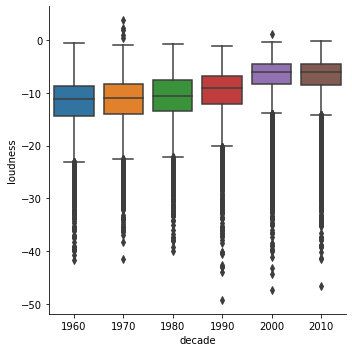

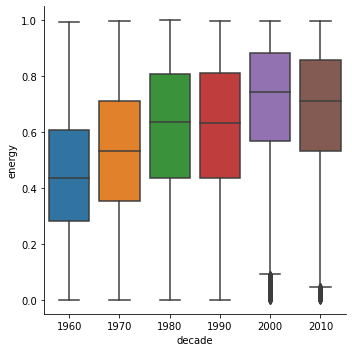

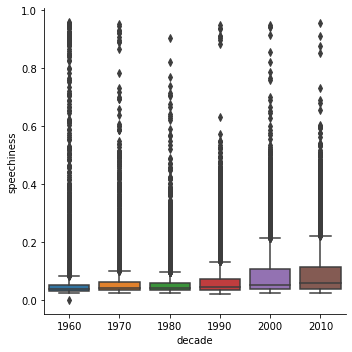

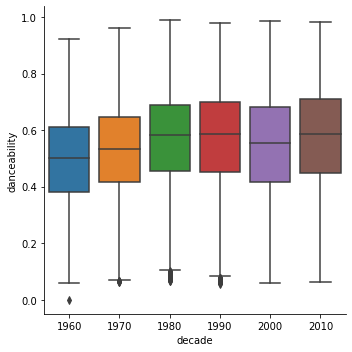

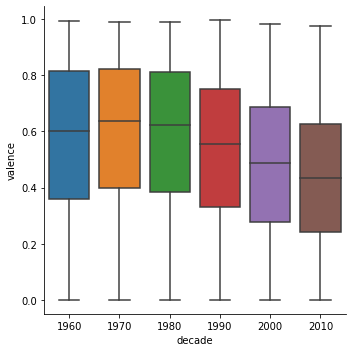

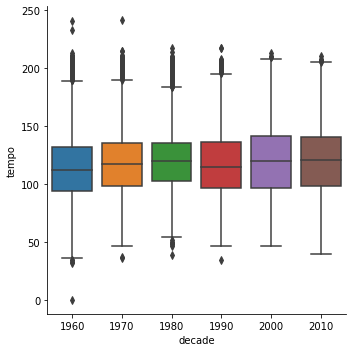

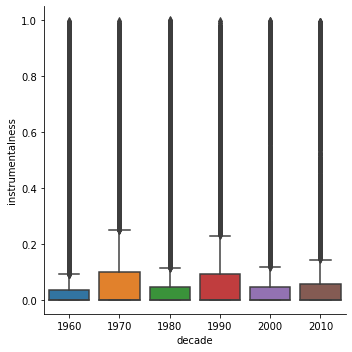

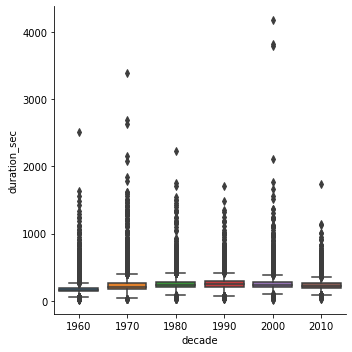

In [ ]:
# Add plots with data from basic analysis of data (decades and overall)

# loudness over time (Box plot)
sns.catplot(x="decade", y="loudness", data=data, kind="box")

# energy over time (Box plot)
sns.catplot(x="decade", y="energy", data=data, kind="box")

# speechiness over time (Box Plot)
sns.catplot(x="decade", y="speechiness", data=data, kind="box")

# danceability over time (Box Plot)
sns.catplot(x="decade", y="danceability", data=data, kind="box")

# valence over time (Box Plot)
sns.catplot(x="decade", y="valence", data=data, kind="box")

# tempo over time (Box Plot)
sns.catplot(x="decade", y="tempo", data=data, kind="box")

# instrumental stats over time (Box Plot)
sns.catplot(x="decade", y="instrumentalness", data=data, kind="box")

# duration over time (Box Plot)
sns.catplot(x="decade", y="duration_sec", data=data, kind="box")

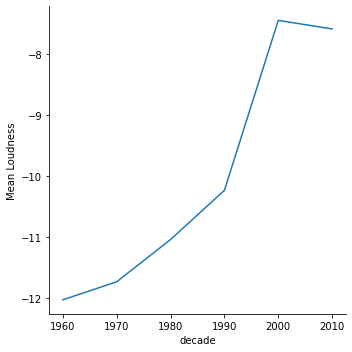

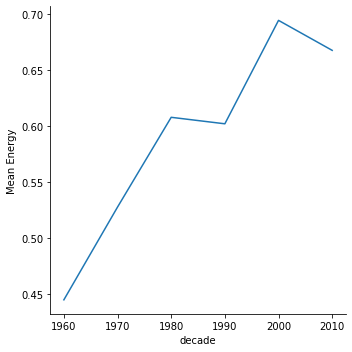

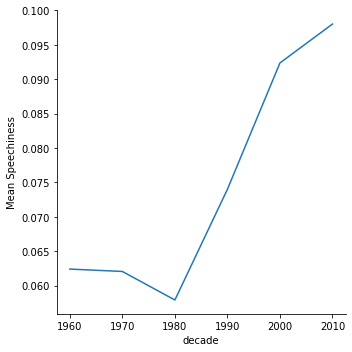

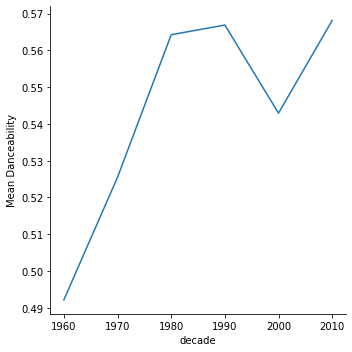

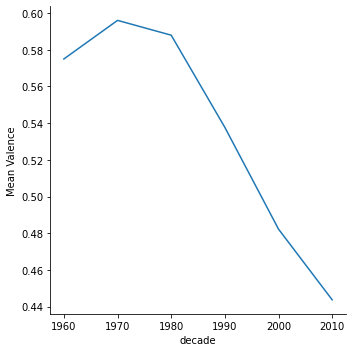

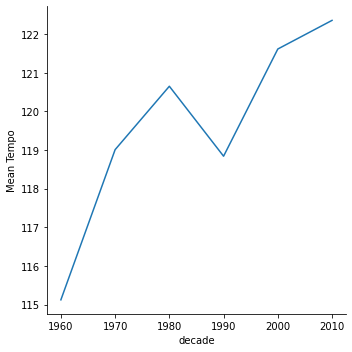

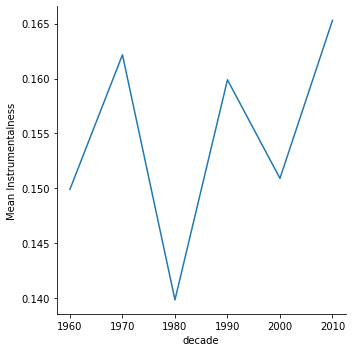

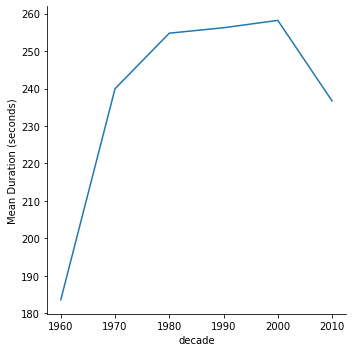

In [ ]:
# Add plots with data from basic analysis of data (decades and overall)

# mean loudness over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = loudness_stats).set(ylabel="Mean Loudness")

# mean energy over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = energy_stats).set(ylabel="Mean Energy")

# mean speechiness over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = speechiness_stats).set(ylabel="Mean Speechiness")

# mean danceability over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = danceability_stats).set(ylabel="Mean Danceability")

# mean valence over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = valence_stats).set(ylabel="Mean Valence")

# mean tempo over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = tempo_stats).set(ylabel="Mean Tempo")

# mean instrumental over time (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = instrumentalness_stats).set(ylabel="Mean Instrumentalness")

# mean duration over (Line Plot)
sns.relplot(x="decade", y="mean", kind="line", data = duration_stats).set(ylabel="Mean Duration (seconds)")


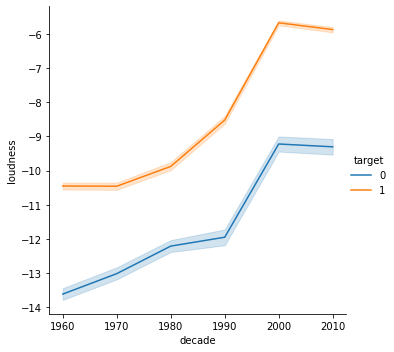

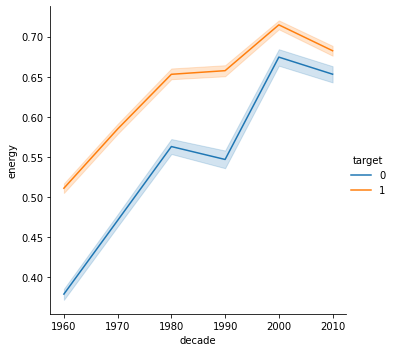

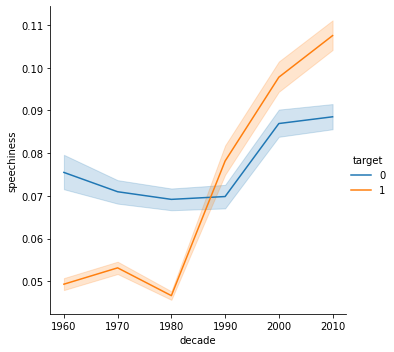

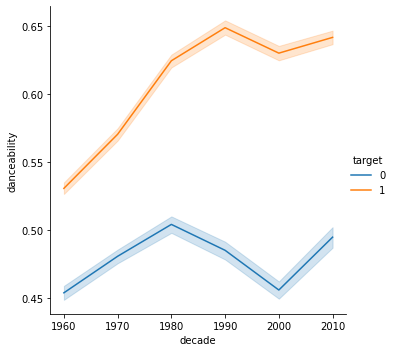

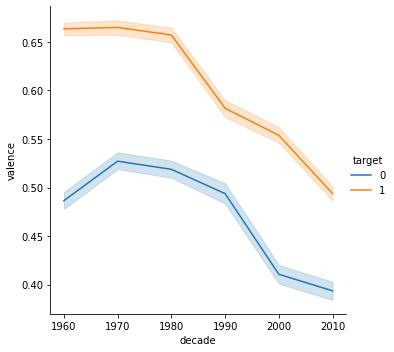

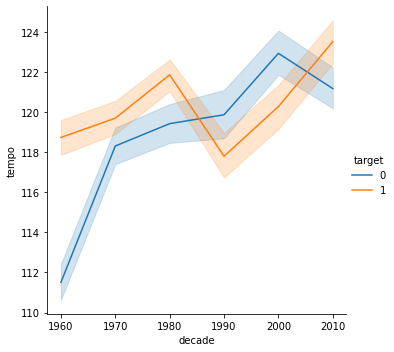

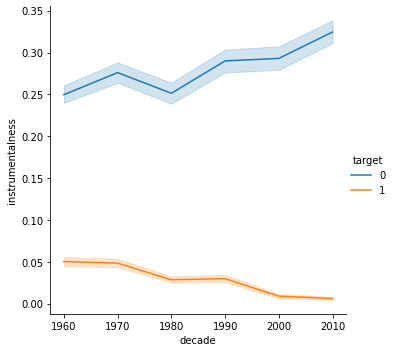

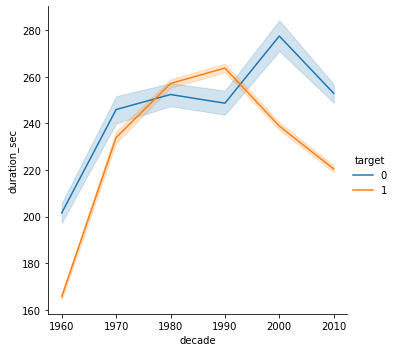

In [ ]:
# Add plots with data from basic analysis of data (decades and overall)

# loudness vs target (Line Plot)
sns.relplot(x="decade", y="loudness", hue="target", kind="line", data = data)

# energy vs target (Line Plot)
sns.relplot(x="decade", y="energy", hue="target", kind="line", data = data)

# speechiness vs target (Line Plot)
sns.relplot(x="decade", y="speechiness", hue="target", kind="line", data = data)

# speechiness vs target (Line Plot)
sns.relplot(x="decade", y="danceability", hue="target", kind="line", data = data)

# valence vs target (Line Plot)
sns.relplot(x="decade", y="valence", hue="target", kind="line", data = data)

# tempo vs target (Line Plot)
sns.relplot(x="decade", y="tempo", hue="target", kind="line", data = data)

# instrumental vs target (Line Plot)
sns.relplot(x="decade", y="instrumentalness", hue="target", kind="line", data = data)

# duration over time (Line Plot)
sns.relplot(x="decade", y="duration_sec", hue="target", kind="line", data = data)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=162d76af-48a2-4f75-9aef-34643a48aa39' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>